In [162]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
from loaders import clean_text_for_pattern_letter
from temp_text import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
500
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [164]:
def predict_train(input_str: str | list, prev_n: int = 20):
    StatsDict: dict[str, dict] = {}

    for inp_idx, inp_ltr in enumerate(input_str):
        # if inp_idx == 0:
        #     continue
        
        for rev_idx in range(prev_n):
            prev_idx = inp_idx - rev_idx - 1

            if prev_idx < 0:
                break

            prev_ltr = input_str[prev_idx]
            
            prev_stats = StatsDict.setdefault(prev_ltr, {})
            stats = prev_stats.setdefault(rev_idx, {})
            stats.setdefault(inp_ltr, 0)
            
            stats[inp_ltr] += 1
    
    return StatsDict

In [165]:
# predict train

prev_n_L1 = 20

StatsDict_L1 = predict_train(input_str=input_str, prev_n=prev_n_L1)

In [166]:
for sdk, sdv in StatsDict_L1.items():
    print(sdk)
    for sd_k, sd_v in sdv.items():
        print(sd_k, sd_v)
    print('')

t
0 {'h': 11, ' ': 3, 'e': 3, 'u': 1, 'o': 2, "'": 2, '.': 1, 's': 1, 'r': 1, 'w': 1, 'z': 1, 'i': 1}
1 {'e': 9, 'w': 2, 'l': 2, 'n': 3, ' ': 3, 's': 3, 'r': 1, 'i': 2, 'u': 1, 'o': 1, 'c': 1}
2 {' ': 12, 'a': 4, 'e': 2, 'i': 1, 'o': 2, '"': 1, 's': 1, 'b': 1, 'r': 1, 'w': 1, 'd': 1, 't': 1}
3 {'s': 3, 'p': 1, 'c': 4, 'v': 1, 'd': 2, ' ': 2, 'n': 1, 'k': 1, 'u': 2, 'i': 3, 'l': 1, 'o': 1, 't': 1, 'y': 1, 'e': 1, 'w': 1, 'a': 2}
4 {'k': 1, 'o': 6, ' ': 5, 'i': 2, 'd': 1, 'e': 2, 'g': 1, 'r': 2, 'h': 2, 't': 1, 'm': 1, 's': 2, 'n': 1, 'c': 1}
5 {'y': 1, 'r': 2, 't': 3, 'l': 2, 's': 2, 'e': 1, ' ': 3, 'h': 1, 'o': 2, 'a': 4, "'": 1, 'k': 1, 'w': 1, 'u': 1, 'f': 1, 'g': 1, 'm': 1}
6 {' ': 8, 't': 4, 'h': 1, 'o': 3, 'i': 2, 'a': 3, 'w': 1, 'r': 1, 's': 2, 'e': 1, 'd': 1, 'y': 1}
7 {'a': 1, ' ': 6, 'e': 2, 'r': 3, 'o': 1, 'd': 2, 'l': 1, "'": 1, 't': 1, '.': 1, 's': 5, 'y': 1, 'c': 1, 'b': 1, 'j': 1}
8 {'b': 1, 'w': 1, ' ': 8, 'n': 2, 'a': 3, 'i': 2, 'm': 3, 'h': 1, 'o': 3, 'l': 1, 'p': 1, '

In [167]:
import copy

def predict(input_str: str | list, StatsDict: dict, letters:list, prev_n: int):
    TF = []
    err = 0

    output = []

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            break

        stats = []

        for rev_idx in range(prev_n):
            let_idx = inp_idx - rev_idx
            if let_idx < 0:
                break
            # print(inp_idx, let_idx, rev_idx)
            st = copy.deepcopy(StatsDict[input_str[let_idx]].get(rev_idx, {}))
            stats.append(st)
        # print(inp)
        for st in stats:
            st_sum = sum(st.values())

            for key, val in st.items():
                st[key] = val / st_sum

            # print(input_str[inp_idx + 1], max(st, key=st.get), st)
            
        letter_stats = {}
        for letter in letters:
            letter_stats.setdefault(letter, 0)

            for st in stats:
                st_let = st.get(letter, 0)

                if st_let == 0:
                    letter_stats[letter] = 0
                    break

                letter_stats[letter] += st_let

        max_key = max(letter_stats, key=letter_stats.get)
        # TF.append(sum(letter_stats.values()))
        # TF.append(letter_stats[max_key])

        ls_arr = np.array(list(letter_stats.values()))
        tf = np.sum(ls_arr > 0)
        
        TF.append(tf)
        
        if inp_idx + 1 < len(input_str):
            print(input_str[inp_idx + 1], max_key, letter_stats[max_key], tf)

            if input_str[inp_idx + 1] != max_key:
                err += 1
        else:
            print('>', max_key, letter_stats[max_key], tf)
        print()

        output.append(max_key)

    return TF, err, output

In [168]:
# predict L1

TF, err, out_L1 = predict(input_str=input_str, StatsDict=StatsDict_L1, prev_n=prev_n_L1, letters=letters)

print(err, err / (len(input_str) / 100) )

h h 0.39285714285714285 12

e e 0.9123376623376624 5

    1.1993644653219122 6

s c 0.5120226622424962 7

k   0.9314233956156833 6

y   0.8260123073421841 2

    1.8665828317324604 1

a a 0.9694323121762175 1

b   1.9492609139988466 2

o o 1.3692957771156393 1

v   2.080412118387834 2

e e 2.562024074954484 1

    2.806957125335489 1

t t 1.3313172348920288 1

h h 2.0195073732407587 1

e e 3.08837544351257 2

    4.0818016888878885 1

p p 1.3513024301463408 1

o o 2.2795705890732783 1

r r 2.154760651933994 1

t t 1.8897492314437088 1

    4.203903631397795 1

w w 1.980098323287047 1

a a 2.8250955025219997 1

s s 2.4645863200499947 1

    4.9171588175501375 1

t t 2.1413177662600416 1

h h 2.184143302177233 1

e e 2.9830207050642303 1

    5.256560406705122 1

c c 1.5845310118882483 1

o   3.5403472887872005 2

l l 1.3835266362491945 1

o o 2.2691619516112818 1

r   3.5063418188839686 2

    4.875326814103286 1

o o 1.7194451203751118 1

f f 1.1929299246149043 1

    4.564080891236626

In [169]:
# peak clusters
KF = []

prec = 1e-5

peaks = {}
second_layer_K: dict[int, dict] = {}

sum_K = {}
for k_idx in range(prev_n_L1):
    sum_K.setdefault(k_idx, {})

    for letter in letters:
        sum_K[k_idx].setdefault(letter, prec)

prev_K = {}
for k_idx in range(prev_n_L1):
    prev_K.setdefault(k_idx, {})

    for letter in letters:
        prev_K[k_idx].setdefault(letter, 0)

for inp_idx, inp in enumerate(input_str):
    sumK = 0

    for k_idx in range(prev_n_L1):
        for letter in letters:
            let_stats = StatsDict_L1[inp][k_idx].get(letter, prec)

            if sum_K[k_idx][letter] <= prec or let_stats <= prec:
                sum_K[k_idx][letter] *= let_stats
            else:
                sum_K[k_idx][letter] += let_stats
        
        sum_K_val = np.array(list(sum_K[k_idx].values()))
        sum_K_val[np.where(sum_K_val == -1)] = 0
        sumK += sum_K_val.sum()
    
    # # if sumK <= 0:
    # if len(KF) > 0 and sumK < KF[-1]: # err: 10 -> 63
    #     for k_idx in range(prev_n_L1):
    #         for letter in letters:
    #             sum_K[k_idx][letter] = 0
        
    #     sumK = 0
    
    # print(sumK)
    if len(KF) > 0 and sumK < KF[-1]:
        prv_idx = inp_idx - 1
        peaks.setdefault(prv_idx, str(prv_idx))
        second_layer_K.setdefault(str(prv_idx), prev_K)
    
    KF.append(sumK)

    prev_K = copy.deepcopy(sum_K)

print(peaks, len(peaks))
print(KF)

{4: '4', 5: '5', 8: '8', 10: '10', 17: '17', 22: '22', 30: '30', 32: '32', 37: '37', 41: '41', 43: '43', 44: '44', 49: '49', 52: '52', 55: '55', 62: '62', 67: '67', 73: '73', 74: '74', 76: '76', 79: '79', 88: '88', 92: '92', 93: '93', 95: '95', 99: '99', 100: '100', 101: '101', 112: '112', 116: '116', 124: '124', 125: '125', 136: '136', 138: '138', 148: '148', 150: '150', 156: '156', 157: '157', 164: '164', 167: '167', 173: '173', 187: '187', 193: '193', 197: '197', 199: '199', 202: '202', 207: '207', 210: '210', 211: '211', 213: '213', 217: '217', 222: '222', 224: '224', 226: '226', 235: '235', 240: '240', 243: '243', 245: '245', 246: '246', 250: '250', 252: '252', 256: '256', 257: '257', 258: '258', 259: '259', 264: '264', 271: '271', 274: '274', 275: '275', 277: '277', 280: '280', 285: '285', 290: '290', 293: '293', 294: '294', 296: '296', 298: '298', 300: '300', 306: '306', 311: '311', 312: '312', 315: '315', 321: '321', 325: '325', 329: '329', 332: '332', 340: '340', 343: '343', 3

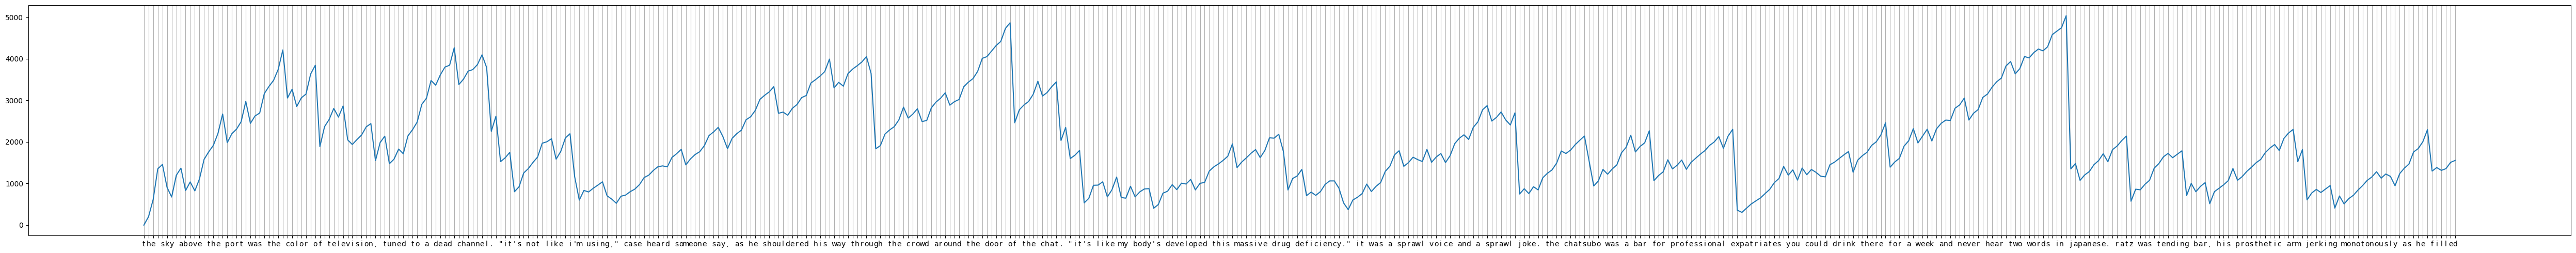

In [170]:
TF = np.array(TF, dtype=float)
# TF = TF - np.pad(TF, (1, 0))[:-1]
# # print(TF)
# TF[np.where(TF > 0)] = 0
# TF = np.abs(TF)
# TF[np.where(TF <= np.mean(TF))] = 0
# # TF[np.where(TF <= 0.5)] = 0
# print(TF.size, TF.max(), TF.min())

KF = np.array(KF)
# KF = KF - np.pad(KF, (0, 1))[1:]
# # print(TF)
# KF[np.where(KF < 0)] = 0
# KF = np.abs(KF)
# KF[np.where(KF <= np.mean(KF[np.where(KF > 0)]))] = 0

# # TF /= np.max(TF)
# KF /= np.max(KF)

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
# axs.plot(np.arange(TF.size), TF)
axs.plot(np.arange(KF.size), KF)
axs.xaxis.set_ticks(np.arange(len(input_str)) ,input_str)
axs.xaxis.grid(True)

plt.show()

In [171]:
print(len(input_str), len(KF))
print(peaks)
print(len(peaks), np.sum(KF > 0))
np.where(KF > 0)

500 500
{4: '4', 5: '5', 8: '8', 10: '10', 17: '17', 22: '22', 30: '30', 32: '32', 37: '37', 41: '41', 43: '43', 44: '44', 49: '49', 52: '52', 55: '55', 62: '62', 67: '67', 73: '73', 74: '74', 76: '76', 79: '79', 88: '88', 92: '92', 93: '93', 95: '95', 99: '99', 100: '100', 101: '101', 112: '112', 116: '116', 124: '124', 125: '125', 136: '136', 138: '138', 148: '148', 150: '150', 156: '156', 157: '157', 164: '164', 167: '167', 173: '173', 187: '187', 193: '193', 197: '197', 199: '199', 202: '202', 207: '207', 210: '210', 211: '211', 213: '213', 217: '217', 222: '222', 224: '224', 226: '226', 235: '235', 240: '240', 243: '243', 245: '245', 246: '246', 250: '250', 252: '252', 256: '256', 257: '257', 258: '258', 259: '259', 264: '264', 271: '271', 274: '274', 275: '275', 277: '277', 280: '280', 285: '285', 290: '290', 293: '293', 294: '294', 296: '296', 298: '298', 300: '300', 306: '306', 311: '311', 312: '312', 315: '315', 321: '321', 325: '325', 329: '329', 332: '332', 340: '340', 343: 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [172]:
sl_input = []
for peak in peaks.values():
    sl_input.append(str(peak))

print(len(sl_input))

125


In [173]:
# second layer predict train

prev_n_L2 = 10

StatsDict_L2 = predict_train(input_str=sl_input, prev_n=prev_n_L2)

for key, val in StatsDict_L2.items():
    print(key, val)

4 {0: {'5': 1}, 1: {'8': 1}, 2: {'10': 1}, 3: {'17': 1}, 4: {'22': 1}, 5: {'30': 1}, 6: {'32': 1}, 7: {'37': 1}, 8: {'41': 1}, 9: {'43': 1}}
5 {0: {'8': 1}, 1: {'10': 1}, 2: {'17': 1}, 3: {'22': 1}, 4: {'30': 1}, 5: {'32': 1}, 6: {'37': 1}, 7: {'41': 1}, 8: {'43': 1}, 9: {'44': 1}}
8 {0: {'10': 1}, 1: {'17': 1}, 2: {'22': 1}, 3: {'30': 1}, 4: {'32': 1}, 5: {'37': 1}, 6: {'41': 1}, 7: {'43': 1}, 8: {'44': 1}, 9: {'49': 1}}
10 {0: {'17': 1}, 1: {'22': 1}, 2: {'30': 1}, 3: {'32': 1}, 4: {'37': 1}, 5: {'41': 1}, 6: {'43': 1}, 7: {'44': 1}, 8: {'49': 1}, 9: {'52': 1}}
17 {0: {'22': 1}, 1: {'30': 1}, 2: {'32': 1}, 3: {'37': 1}, 4: {'41': 1}, 5: {'43': 1}, 6: {'44': 1}, 7: {'49': 1}, 8: {'52': 1}, 9: {'55': 1}}
22 {0: {'30': 1}, 1: {'32': 1}, 2: {'37': 1}, 3: {'41': 1}, 4: {'43': 1}, 5: {'44': 1}, 6: {'49': 1}, 7: {'52': 1}, 8: {'55': 1}, 9: {'62': 1}}
30 {0: {'32': 1}, 1: {'37': 1}, 2: {'41': 1}, 3: {'43': 1}, 4: {'44': 1}, 5: {'49': 1}, 6: {'52': 1}, 7: {'55': 1}, 8: {'62': 1}, 9: {'67': 1}

In [174]:
letters_L2 = copy.deepcopy(sl_input)

TF_L2, err_L2, out_L2 = predict(input_str=sl_input, StatsDict=StatsDict_L2, prev_n=prev_n_L2, letters=letters_L2)

print(err_L2, err_L2 / (len(sl_input) / 100) )


5 5 1.0 1

8 8 2.0 1

10 10 3.0 1

17 17 4.0 1

22 22 5.0 1

30 30 6.0 1

32 32 7.0 1

37 37 8.0 1

41 41 9.0 1

43 43 10.0 1

44 44 10.0 1

49 49 10.0 1

52 52 10.0 1

55 55 10.0 1

62 62 10.0 1

67 67 10.0 1

73 73 10.0 1

74 74 10.0 1

76 76 10.0 1

79 79 10.0 1

88 88 10.0 1

92 92 10.0 1

93 93 10.0 1

95 95 10.0 1

99 99 10.0 1

100 100 10.0 1

101 101 10.0 1

112 112 10.0 1

116 116 10.0 1

124 124 10.0 1

125 125 10.0 1

136 136 10.0 1

138 138 10.0 1

148 148 10.0 1

150 150 10.0 1

156 156 10.0 1

157 157 10.0 1

164 164 10.0 1

167 167 10.0 1

173 173 10.0 1

187 187 10.0 1

193 193 10.0 1

197 197 10.0 1

199 199 10.0 1

202 202 10.0 1

207 207 10.0 1

210 210 10.0 1

211 211 10.0 1

213 213 10.0 1

217 217 10.0 1

222 222 10.0 1

224 224 10.0 1

226 226 10.0 1

235 235 10.0 1

240 240 10.0 1

243 243 10.0 1

245 245 10.0 1

246 246 10.0 1

250 250 10.0 1

252 252 10.0 1

256 256 10.0 1

257 257 10.0 1

258 258 10.0 1

259 259 10.0 1

264 264 10.0 1

271 271 10.0 1

274 274

In [175]:
# probability clusters
for key, val in second_layer_K.items():
    pass

In [176]:
def downstream_predict(input_str: str | list, 
                       StatsDict_L1: dict, 
                       letters: list,
                       out_L2: list,
                       peaks: dict,
                       second_layer_K: dict[int, dict],
                       prev_n: int, ):
    TF = []
    err = 0

    out_idx = 1

    ds_K = second_layer_K[out_L2[0]]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            break

        is_peak = peaks.get(inp_idx - 1, -1)
        if is_peak != -1 and out_idx < len(out_L2):
            ds_K = second_layer_K[out_L2[out_idx]]
            out_idx += 1

        stats = []
        # print(f'{ds_K=}')
        # ds_stats = []
        for rev_idx in range(prev_n):
            let_idx = inp_idx - rev_idx
            
            if let_idx < 0:
                break
            # print(inp_idx, let_idx, rev_idx)
            st = copy.deepcopy(StatsDict_L1[input_str[let_idx]].get(rev_idx, {}))
            stats.append(st)

            # ds_st = ds_K[rev_idx]
            # ds_stats.append(ds_st)
        # for st_idx, st in enumerate(stats):
        #     ds_st = ds_K[st_idx]

        #     for key, val in st.items():
        #         if ds_st[key] != -1:
        #             st[key] += ds_st[key]
                # else:
                #     st[key] = 1e-30

        # print(inp)
        for st_idx, st in enumerate(stats):
            st_sum = sum(st.values())

            ds_st = ds_K[st_idx]
            ds_arr = np.array(list(ds_st.values()))
            ds_arr[np.where(ds_arr < 0)] = 0
            ds_sum = np.sum(ds_arr)

            for key, val in st.items():
                st[key] = val / st_sum
                if ds_sum > 0:
                    ds_st[key] = ds_st[key] / ds_sum
                if ds_st[key] < 0:
                    ds_st[key] = -1
                # else:
                #     st[key] = 0
            # print(input_str[inp_idx + 1], max(st, key=st.get), st)
            # print(ds_K[st_idx])
            
        letter_stats = {}
        for letter in letters:
            letter_stats.setdefault(letter, 0)

            for st in stats:
                st_let = st.get(letter, 0)

                if st_let == 0:
                    letter_stats[letter] = 0
                    break

                letter_stats[letter] += st_let
            
            for rank_idx in range(prev_n):
                ds_smbl_prob = ds_K[rank_idx].get(letter, -1)
                if ds_smbl_prob == -1:
                    continue
            
                letter_stats[letter] *= ds_smbl_prob # *=
        # print(f'{letter_stats=}')

        max_key = max(letter_stats, key=letter_stats.get)
        # TF.append(sum(letter_stats.values()))
        # TF.append(letter_stats[max_key])

        ls_arr = np.array(list(letter_stats.values()))
        tf = np.sum(ls_arr > 0)
        
        TF.append(tf)
        
        if inp_idx + 1 < len(input_str):
            print(input_str[inp_idx + 1], max_key, letter_stats[max_key], tf)

            if input_str[inp_idx + 1] != max_key:
                err += 1
        else:
            print('>', max_key, letter_stats[max_key], tf)
        print()

    return TF, err

In [177]:
ds_TF, ds_err = downstream_predict(input_str=input_str,
                                   StatsDict_L1=StatsDict_L1,
                                   letters=letters,
                                   out_L2=out_L2,
                                   peaks=peaks,
                                   second_layer_K=second_layer_K,
                                   prev_n=prev_n_L1, )


print(ds_err, ds_err / (len(input_str) / 100) )

h   2618760725949.7373 7

e   109697952302.7996 5

    28739168974.788723 6

s e 4.443098217431635e-101 5

k   10940380.541139469 5

y   5.406015605548059e+21 1

    2334758472387092.5 1

a a 1.8185620004403766e-286 1

b   4063362282220.617 1

o o 3.236037514046324e-151 1

v   967865615.3801115 1

e e 1.812093632218889e-231 1

    0.0001462724996557528 1

t a 0.0 0

h a 0.0 0

e   3.0977033106552636e-11 2

    4.950801096129047e-13 1

p a 0.0 0

o o 2.4847121622803602e-228 1

r a 0.0 0

t a 0.0 0

    1.1121690257458336e-27 1

w a 0.0 0

a a 0.0 0

s a 0.0 0

    8.405676329100823e-29 1

t a 0.0 0

h a 0.0 0

e e 3.269367432639053e-297 1

    8.985869080621617e-29 1

c a 0.0 0

o   4.082741801701974e-29 2

l a 0.0 0

o o 2.22506494624175e-310 1

r   1.2476974378980208e-34 1

    1.7348373573025818e-34 1

o o 2.6051208554e-313 1

f a 0.0 0

    1.8729779481741957e-31 1

t a 0.0 0

e   1.67075360049534e-33 2

l a 0.0 0

e   5.95231140341933e-44 1

v a 0.0 0

i a 0.0 0

s a 0.0 0

i   4.0